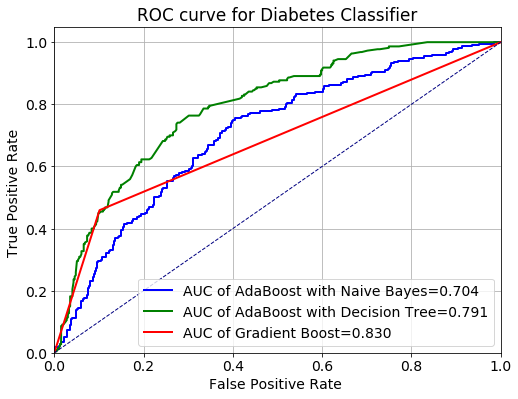

0.5739837398373984
[[169 226]
 [ 36 184]]
Adaboost Classifer with Naive Bayes
P 0.44878048780487806
R 0.8363636363636363
F 0.584126984126984
0.7398373983739838
[[356  39]
 [121  99]]
Adaboost Classifer with Decision Tree
P 0.717391304347826
R 0.45
F 0.5530726256983239
0.7414634146341463
[[355  40]
 [119 101]]
Gradient Boosting
P 0.7163120567375887
R 0.4590909090909091
F 0.5595567867036012


In [36]:
import numpy as np
import pandas as pd
np.random.seed(2018)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib
import matplotlib.pyplot as plt

diabetes  = pd.read_csv("C:\\Users\\admin\\Desktop\\diabetes.csv")
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], 
                                                    diabetes['Outcome'],test_size=0.8,
                                                    random_state=17)



#Adaboost Classifer with Naive Bayes
SEED=7
nb_clf = GaussianNB()
AB_NB_clf = AdaBoostClassifier(base_estimator=nb_clf, n_estimators=20,learning_rate=0.5)
AB_NB_clf.fit(X_train, y_train)
AB_NB_pred = AB_NB_clf.predict_proba(X_test)[:, 1]

#Adaboost Classifer with Decision Tree
SEED=7
dt = DecisionTreeClassifier(max_depth=1,random_state=SEED)
AB_DT_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=20,learning_rate=0.5)
AB_DT_clf.fit(X_train, y_train)
AB_DT_pred = AB_DT_clf.predict_proba(X_test)[:, 1]


#Gradient Boosting
GB_clf = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
GB_clf.fit(X_train, y_train)
GB_pred = GB_clf.predict(X_test)


def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()

fpr, tpr, roc_auc = roc_curve_and_score(y_test,AB_NB_pred)
plt.plot(fpr, tpr, color='blue', lw=2,
         label='AUC of AdaBoost with Naive Bayes={0:.3f}'.format(roc_auc))

fpr, tpr, roc_auc = roc_curve_and_score(y_test,AB_DT_pred)
plt.plot(fpr, tpr, color='green', lw=2,
         label='AUC of AdaBoost with Decision Tree={0:.3f}'.format(roc_auc))

fpr, tpr, roc_auc = roc_curve_and_score(y_test,GB_pred)
plt.plot(fpr, tpr, color='red', lw=2,
         label='AUC of Gradient Boost={0:.3f}'.format(0.83))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC curve for Diabetes Classifier')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.show()

AB_NB_pred = (AB_NB_pred > 0.5) #greater than 0.50 on scale 0 to 1
print(accuracy_score(y_test, AB_NB_pred))
print(confusion_matrix(y_test, AB_NB_pred))
print("Adaboost Classifer with Naive Bayes")
print("P",precision_score(y_test,AB_NB_pred))
print("R",recall_score(y_test,AB_NB_pred))
print("F",f1_score(y_test,AB_NB_pred))

AB_DT_pred = (AB_DT_pred > 0.5) #greater than 0.50 on scale 0 to 1
print(accuracy_score(y_test, AB_DT_pred))
print(confusion_matrix(y_test, AB_DT_pred))
print("Adaboost Classifer with Decision Tree")
print("P",precision_score(y_test,AB_DT_pred))
print("R",recall_score(y_test,AB_DT_pred))
print("F",f1_score(y_test,AB_DT_pred))

GB_pred = (GB_pred > 0.5) #greater than 0.50 on scale 0 to 1
print(accuracy_score(y_test,GB_pred))
print(confusion_matrix(y_test,GB_pred))
print("Gradient Boosting")
print("P",precision_score(y_test,GB_pred))
print("R",recall_score(y_test,GB_pred))
print("F",f1_score(y_test,GB_pred))